In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
import warnings
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [46]:
df=pd.read_csv("data/final_data.csv")

In [47]:
df.head(2)


,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000
1,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000


In [48]:
df.select_dtypes([int,float]).corr()['current_value'].sort_values(ascending=False)

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
height                 0.040535
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   position             10754 non-null  object 
 1   height               10754 non-null  float64
 2   age                  10754 non-null  float64
 3   appearance           10754 non-null  int64  
 4   goals                10754 non-null  float64
 5   assists              10754 non-null  float64
 6   yellow cards         10754 non-null  float64
 7   second yellow cards  10754 non-null  float64
 8   red cards            10754 non-null  float64
 9   goals conceded       10754 non-null  float64
 10  clean sheets         10754 non-null  float64
 11  minutes played       10754 non-null  int64  
 12  days_injured         10754 non-null  int64  
 13  games_injured        10754 non-null  int64  
 14  award                10754 non-null  int64  
 15  current_value        10754 non-null 

basic preprocesssing


In [50]:
cat_columns = ["position"]
num_columns = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
               'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'highest_value']

In [51]:
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler() )]
)

In [52]:
cat_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder", OneHotEncoder()),
        ("scaler", StandardScaler(with_mean=False) )]
)

In [53]:
preprocesssor = ColumnTransformer([
    ("num_pipe", num_pipeline, num_columns),
    ("cat_pipe", cat_pipeline, cat_columns)
])

train test split

In [54]:
X=df.drop(columns='current_value')
y=df['current_value']

X=preprocesssor.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

model evaluation

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4582094.1237
- Mean Absolute Error: 2231823.3705
- R2 Score: 0.7531
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4311031.1391
- Mean Absolute Error: 2103878.3933
- R2 Score: 0.7467




d:\Projects\mlpredvalue\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.890e+15, tolerance: 7.317e+13
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 4582093.5811
- Mean Absolute Error: 2231693.6692
- R2 Score: 0.7531
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4311039.8025
- Mean Absolute Error: 2103820.1381
- R2 Score: 0.7467


Ridge
Model performance for Training set
- Root Mean Squared Error: 4582094.0838
- Mean Absolute Error: 2231461.0539
- R2 Score: 0.7531
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4310988.0987
- Mean Absolute Error: 2103538.8626
- R2 Score: 0.7467


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3468278.2809
- Mean Absolute Error: 1481689.0620
- R2 Score: 0.8586
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4162911.9732
- Mean Absolute Error: 1757752.2083
- R2 Score: 0.7638


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 190.5900
- 

In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.892981
6,XGBRegressor,0.884866
4,Decision Tree,0.852016
3,K-Neighbors Regressor,0.763807
2,Ridge,0.746705
0,Linear Regression,0.746700
1,Lasso,0.746699


Selecting XGBoost for further training ebcause of its higher accuracy

In [58]:
from xgboost import XGBRegressor

In [59]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        #verbose=1
    )
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Regressor')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [60]:
import matplotlib.pyplot as plt


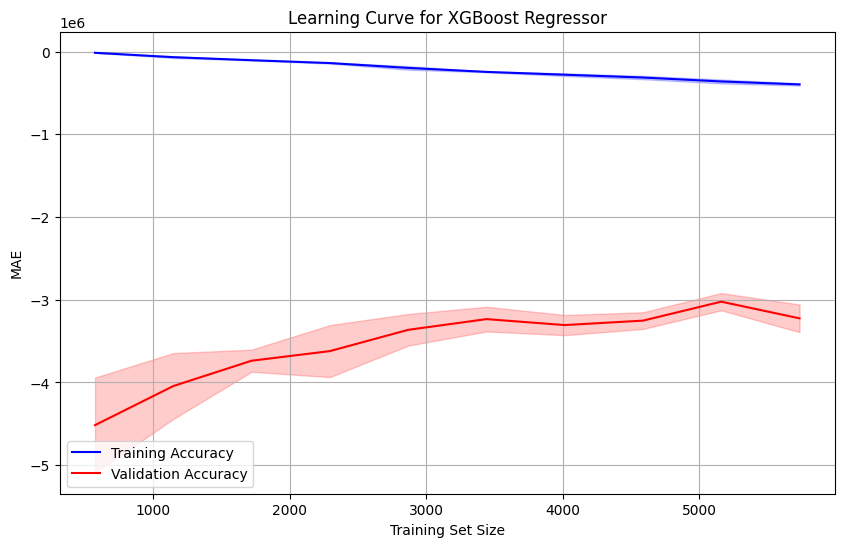

In [61]:
plot_learning_curve(XGBRegressor()) #initial model


Hyper parameter tuning

In [62]:


from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,200],
            'max_depth':[1,2,4],
            'learning_rate':[0.01,0.02,0.1]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=1,
                         n_jobs=-1
)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
-2941538.5060909665
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


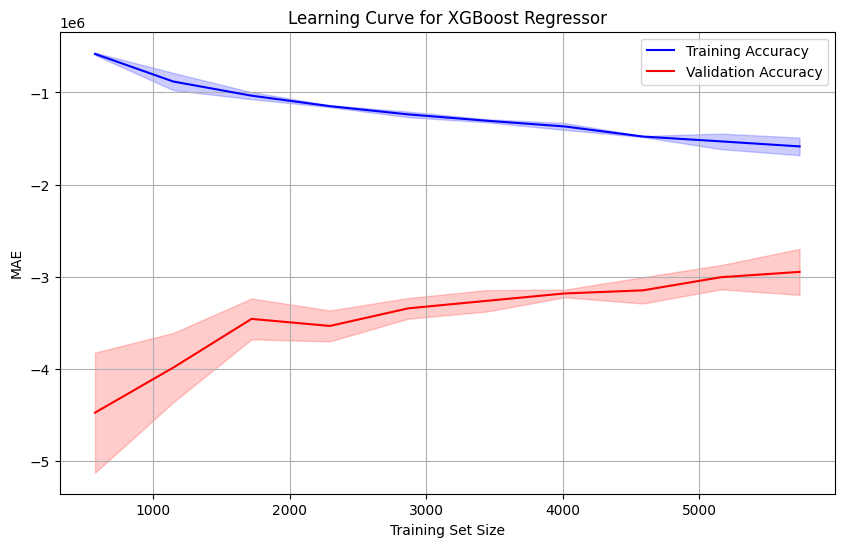

In [63]:
plot_learning_curve(best_model)

In [64]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

r2 score calculation

In [65]:
from sklearn import metrics

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_squared_error(train_prediction,y_train)
mae_test=metrics.mean_squared_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9631689239374145, 'MAE_train': 2936527272513.8003, 'RMSE_train': 1713629.85283106}
{'R2_test': 0.8714775295401144, 'MAE_test': 6982708282660.226, 'RMSE_test': 2642481.4630684215}
